# PRESIDENTIAL vs. GOBERNOR ELECTIONS IN TWO "LIBERAL" COUNTIES

Two well-known "liberal" regions of the United States have been chosen: 
1) Washtenaw County, MI. This county includes cities such as Ann Arbor and several universities such as University of Michigan at Ann Arbor.
2) Middlesex County, MA.This county includes cities such as Cambridge and several universities such as MIT and Harvard University.

The general perception about these two counties is that they are very liberal areas where the republican party has nearly nothing to do. This is an impression derived from elections at the federal level (for example, presidential elections) and the question is whether or not that picture remains true at the state level (governor elections).



Michigan's data comes from the following website:
http://www.michigan.gov/sos/0,4670,7-127-1633_8722---,00.html
Following the links, tab separated values files for all the elections can be downloaded. For example:
http://miboecfr.nictusa.com/election/results/2016GEN_CENR.html

Massachusetts' data comes from the following website:
https://www.sec.state.ma.us/ele/
Following the links, tables with electoral data can be accessed and used to generate csv files. For example:
http://electionstats.state.ma.us/elections/view/40060/

In [57]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#Let's make use of the ggplot2 style
mpl.style.use('ggplot')
#It will plot the figure inline (within the notebook)
%matplotlib notebook


# MASSACHUSETTS

The next two functions will help reading and formating the information from Middlesex county, MA

In [59]:
def read_ma_file(year, file):
    '''Read the csv file with the right options into a DataFrame and includes the year as index of that DataFrame
    Returns the generated DataFrame'''
    new_df=pd.read_csv(file, encoding="ISO-8859-1", thousands=',')
    new_df=clean_MA_data(new_df)
    new_df['Year'] = year
    new_df.set_index('Year', inplace=True)
    return new_df

In [58]:
def clean_MA_data(df):
    '''Further modify the DataFrame df to eliminate information not related to the middlesex county or about parties that are
    not the Democrat or Republican
    It returns the modified DataFrame'''
    df.drop(['Unnamed: 1','Unnamed: 2'], axis=1, inplace=True)
    df.dropna(axis=0, inplace=True)
    df['County'] = df['County'].apply(lambda x: x.split('More')[0])
    df.reset_index(drop=True, inplace=True)
    for i in range(1,df.shape[1]-1):
        df.iloc[:,i] /= df['Total Votes Cast']/100
    #Keep information only about middlesex county
    df = df[(df['County']=='MIDDLESEX')]
    #Keep only the to most voted candidates (republican and democrat)
    df = df.iloc[:,[0,1,2]]    
    return df

### President General Elections

Let's read the files with presidential results and group the results in a single dataframe

In [60]:
#2000
ma_2000_df=read_ma_file(2000,'MA_Elections_2000.csv')
#2004
ma_2004_df=read_ma_file(2004,'MA_Elections_2004.csv')
#2008
ma_2008_df=read_ma_file(2008,'MA_Elections_2008.csv')
#2012
ma_2012_df=read_ma_file(2012,'MA_Elections_2012.csv')
#2016
ma_2016_df=read_ma_file(2016,'MA_Elections_2016.csv')
#Let's rename columns as Democratic or Republican
for df in [ma_2000_df, ma_2004_df, ma_2008_df, ma_2012_df, ma_2016_df]:
    df.columns = ['County', 'Democratic','Republican']
#Merge them into one DataFrame
ma_president_res = pd.concat([ma_2000_df,ma_2004_df, ma_2008_df, ma_2012_df, ma_2016_df])

Let's take a look at one of our one year DataFrame and also at the final MA presidential DataFrame

In [61]:
print(ma_2000_df,'\n')
print(ma_president_res)

         County  Democratic  Republican
Year                                   
2000  MIDDLESEX   60.884326   29.973901 

         County  Democratic  Republican
Year                                   
2000  MIDDLESEX   60.884326   29.973901
2004  MIDDLESEX   63.681970   34.352082
2008  MIDDLESEX   63.585265   33.643992
2012  MIDDLESEX   62.294225   35.295492
2016  MIDDLESEX   64.350816   27.180911


### Governor General Elections

Let's read the files with governor elections results and group the results in a single dataframe

In [62]:
#1998
ma_1998_df=read_ma_file(1998,'MA_Elections_1998.csv')
#2002
ma_2002_df=read_ma_file(2002,'MA_Elections_2002.csv')
#2006
ma_2006_df=read_ma_file(2006,'MA_Elections_2006.csv')
#2010
ma_2010_df=read_ma_file(2010,'MA_Elections_2010.csv')
#2014
ma_2014_df=read_ma_file(2014,'MA_Elections_2014.csv')
#Let's rename columns as Democratic or Republican
for df in [ma_2006_df, ma_2010_df]:
    df.columns = ['County', 'Democratic','Republican']    
#Let's rename columns as Democrat or Republican. For these years (republican victory) republican results appear 
#before democrat ones
for df in [ma_1998_df, ma_2002_df, ma_2014_df]:
    df.columns = ['County','Republican', 'Democratic']
#Reorder columns
ma_1998_df = ma_1998_df[['County', 'Democratic','Republican']]
ma_2002_df = ma_2002_df[['County', 'Democratic','Republican']]
ma_2014_df = ma_2014_df[['County', 'Democratic','Republican']]
#Merge them into one DataFrame
ma_governor_res = pd.concat([ma_1998_df,ma_2002_df, ma_2006_df, ma_2010_df, ma_2014_df])

Let's take a look at one of our one year DataFrame and also at the final MA governor DataFrame

In [64]:
print(ma_1998_df,'\n')
print(ma_governor_res)

         County  Democratic  Republican
Year                                   
1998  MIDDLESEX   48.679606   48.198053 

         County  Democratic  Republican
Year                                   
1998  MIDDLESEX   48.679606   48.198053
2002  MIDDLESEX   44.175545   48.858152
2006  MIDDLESEX   55.669485   34.495324
2010  MIDDLESEX   50.758817   40.552427
2014  MIDDLESEX   49.714019   44.904914


# MICHIGAN

The next two functions will help reading and formating the information from WASHTENAW county, MI

In [78]:
def clean_MI_data(df, elections='President of the United States 4 Year Term (1) Position'):
    '''Extract the relevant information form the DataFrame that contains all the information in the xlx files'''
    df = df[df['OfficeDescription']==elections]
    df =df[['CountyName','PartyDescription','CandidateVotes']]
    #Let's only keep the information about Wasthenaw county 
    df = df[df['CountyName'] == 'WASHTENAW']
    #Reset the index
    df.reset_index(drop=True, inplace=True)
    #Let's add together all the CandidateVotes by party and county
    df = pd.pivot_table(data=df,  index='CountyName', values='CandidateVotes', columns='PartyDescription', 
                          margins=True, aggfunc=np.sum, margins_name='TOTALS')
    #Reset the index but keep the county names in a new column
    df.reset_index(drop=False, inplace=True)
    #Let's compute percentages
    totals = df['TOTALS']
    df = df[['CountyName','Democratic','Republican']]
    df['Democratic'] /= totals/100
    df['Republican'] /= totals/100
    #Rename the columns
    df.columns = ['County', 'Democratic', 'Republican']
    return df.iloc[[0]]

### President General Elections

Let's read the files with president elections results and group the results in a single dataframe

In [79]:
#2000
my_df = pd.read_table('MI_Elections_2000.xls')
mi_2000_df = clean_MI_data(my_df)
#2004
my_df = pd.read_table('MI_Elections_2004.xls')
mi_2004_df = clean_MI_data(my_df)
#2008
my_df = pd.read_table('MI_Elections_2008.xls')
mi_2008_df = clean_MI_data(my_df)
#2012
my_df = pd.read_table('MI_Elections_2012.xls')
mi_2012_df = clean_MI_data(my_df)
#2016
my_df = pd.read_table('MI_Elections_2016.xls')
mi_2016_df = clean_MI_data(my_df)
#Merge them into one DataFrame
mi_president_res = pd.concat([mi_2000_df,mi_2004_df, mi_2008_df, mi_2012_df, mi_2016_df])
#Copy the indexes from the MA DataFrame
mi_president_res.index = ma_president_res.index

Let's take a look at the final MI president DataFrame

In [80]:
mi_president_res

,County,Democratic,Republican
Year,,,
2000,WASHTENAW,59.781289,36.193597
2004,WASHTENAW,63.459807,35.468995
2008,WASHTENAW,69.784892,28.830398
2012,WASHTENAW,67.313689,31.411199
2016,WASHTENAW,68.132550,26.848837


### Governor General Elections

In [81]:
#1998
my_df = pd.read_table('MI_Elections_1998.xls')
mi_1998_df = clean_MI_data(my_df, elections='Governor 4 Year Term (1) Position')
#2002
my_df = pd.read_table('MI_Elections_2002.xls')
mi_2002_df = clean_MI_data(my_df, elections='Governor 4 Year Term (1) Position')
#2006
my_df = pd.read_table('MI_Elections_2006.xls')
mi_2006_df = clean_MI_data(my_df, elections='Governor 4 Year Term (1) Position')
#2010
my_df = pd.read_table('MI_Elections_2010.xls')
mi_2010_df = clean_MI_data(my_df, elections='Governor 4 Year Term (1) Position')
#2014
my_df = pd.read_table('MI_Elections_2014.xls')
mi_2014_df = clean_MI_data(my_df, elections='Governor 4 Year Term (1) Position')
#Merge them into one DataFrame
mi_governor_res = pd.concat([mi_1998_df,mi_2002_df, mi_2006_df, mi_2010_df, mi_2014_df])
#Copy the indexes from the MA DataFrame
mi_governor_res.index = ma_governor_res.index

Let's take a look at the final MI governor DataFrame

In [82]:
mi_governor_res

,County,Democratic,Republican
Year,,,
1998,WASHTENAW,42.939027,57.026688
2002,WASHTENAW,61.405549,36.901018
2006,WASHTENAW,68.002833,30.624720
2010,WASHTENAW,49.855423,48.355485
2014,WASHTENAW,56.466687,41.678245


# THE CHART

This function will plot each of the subplots of the complete chart 

In [83]:
def plot_election_results(gov_res_df,pres_res_df,title=''):
    #Blue dashed line with triangle markers indicating the electoral years
    plt.plot(gov_res_df.index, gov_res_df['Democratic'], color='blue', alpha=0.6, linestyle='--', marker='^'
         , label='D-Vote (Governor)')
    #Red dashed line with triangle markers indicating the electoral years
    plt.plot(gov_res_df.index, gov_res_df['Republican'], color='red', alpha=0.6, linestyle='--', marker='^'
             , label='R-Vote (Governor)')
    #Blue line with cirle markers indicating the electoral years
    plt.plot(pres_res_df.index, pres_res_df['Democratic'], color='blue', alpha=0.6, linestyle='-', marker='o',
             label='D-Vote (President)')
    #Red line with cirle markers indicating the electoral years
    plt.plot(pres_res_df.index, pres_res_df['Republican'], color='red', alpha=0.6, linestyle='-', marker='o'
             , label='R-Vote (President)')
    #The x-axis ticks correspond to electoral years
    ticks_pos = sorted(gov_res_df.index.tolist() + pres_res_df.index.tolist())
    ticks_names = [str(x) for x in ticks_pos]
    plt.xticks(ticks_pos,ticks_names)
    #The y-axis ticks correspond to vote percentage. Y-axis won't be truncated to prevent a deceiving representation of the
    #voting percentages
    plt.yticks(range(0,110,10),range(0,110,10));
    plt.ylim((0,100))
    #Axis labels
    plt.xlabel('Year')
    plt.ylabel('% of Vote')
    #To remark the important gap between democrat and republican vote in presidential elections I have fill the space between
    #those lines in grey
    plt.fill_between(pres_res_df.index, pres_res_df['Democratic'], pres_res_df['Republican'],
                    color='grey', alpha=0.2)
    #Let's allow matplotlib to find the best location for the legend
    plt.legend(loc=0)
    #Custom title provided by the function argument title
    plt.title(title)

Let's create a figure with two subplots: one for the MA results, the other for the MI results.

In both cases, the presidential elections clearly back the reputation of being liberal counties. Democrats are always the preferred option and the differences are never smaller than 25 points. I highlight this by using a grey filling between both curves. On the other hand, at the state level (governor elections) is observed that in both counties there are wild differences from one election to the other. Sometimes, democrats clearly win, others republicans win the elections in these counties and some times the results are so similar that it should be consider a virtual draw.

In order to do the visual more easy to understand, I used red color for republican results and blue for the democrats, as it is traditional. I have also use markers to indicate the electoral years for each trend line. I decided to use line plots because I wanted to focus on the trend over time. This trend is much more predictable and stable in the case of president elections than in the case of governor elections.

<IPython.core.display.Javascript object>


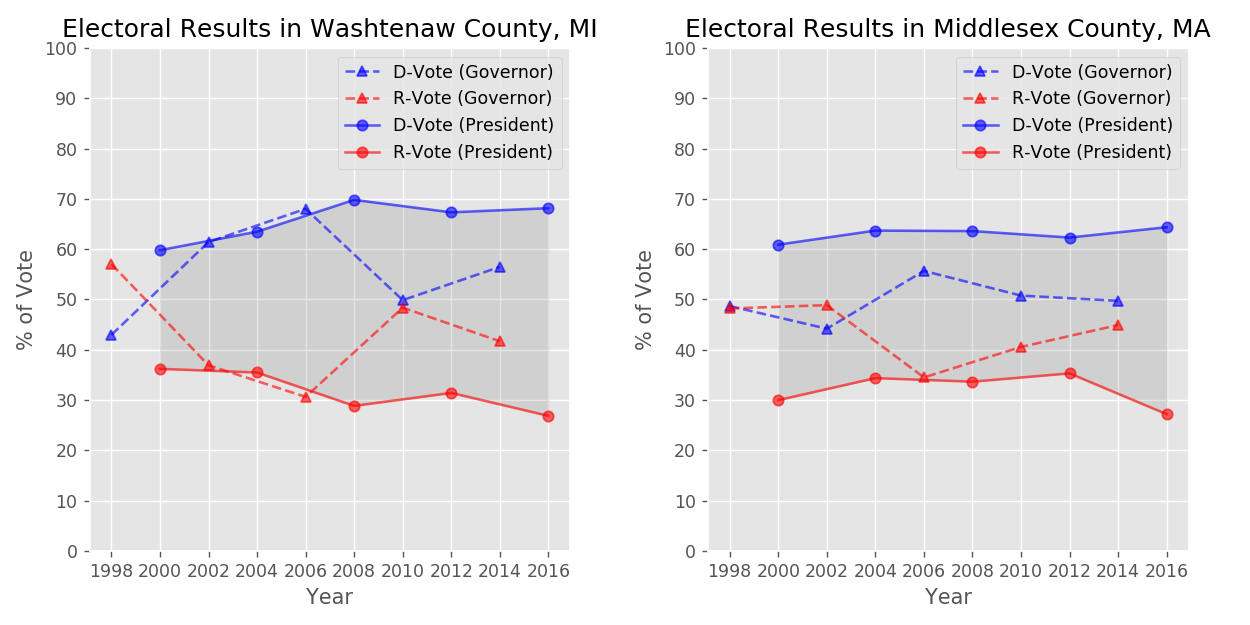

In [84]:
my_figure = plt.figure(figsize=(10,5))
#The subplot of the left includes information from Washtenaw County, MI
my_ax_1 = my_figure.add_subplot(1,2,1)
plot_election_results(mi_governor_res,mi_president_res,title='Electoral Results in Washtenaw County, MI')
#The subplot of the right includes information from Middlesex County, MA
my_ax_2 = my_figure.add_subplot(1,2,2)
plot_election_results(ma_governor_res,ma_president_res,title='Electoral Results in Middlesex County, MA')
plt.tight_layout()